In [37]:
import glob
import yaml
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [39]:

# Define the path to the NLU YAML files
nlu_files_path = "../data/*.yml"

# Initialize an empty dictionary to store the intent examples count
intent_examples_count = {}

print(glob.glob(nlu_files_path))

# Iterate over each NLU YAML file
for file_path in glob.glob(nlu_files_path):
  with open(file_path, 'r') as file:
    nlu_data = yaml.safe_load(file)
    for intent in nlu_data['nlu']:
  
      try:
        intent_name = intent['intent']
        if (intent_name == 'greet' or intent_name == 'thanks'):
          continue
        examples_count = len(intent['examples'].split('- '))
        if intent_name in intent_examples_count:
          intent_examples_count[intent_name] += examples_count
        else:
          intent_examples_count[intent_name] = examples_count

      except KeyError:
        pass

['../data/nlu.yml', '../data/nlu_basic_dialogue.yml', '../data/nlu_from_forms.yml', '../data/nlu_lookup.yml', '../data/nlu_regex.yml', '../data/nlu_syn.yml', '../data/nlu_thay_Nguyen.yml']


                                                    Example Count
ask_working_time                                               48
ask_contact                                                    35
ask_exam_time                                                  46
ask_exam_venue                                                 41
ask_select_exam_date                                           46
ask_fee_inquiry                                                40
ask_student_discount                                           51
ask_late_graduate_discount                                     42
ask_exam_registration_docs                                     48
ask_paper_notarization                                         35
ask_student_id_notarization                                    47
ask_competition_registration_process                           40
competition_registration_process_far                           46
ask_practice_papers                                            41
receive_ce

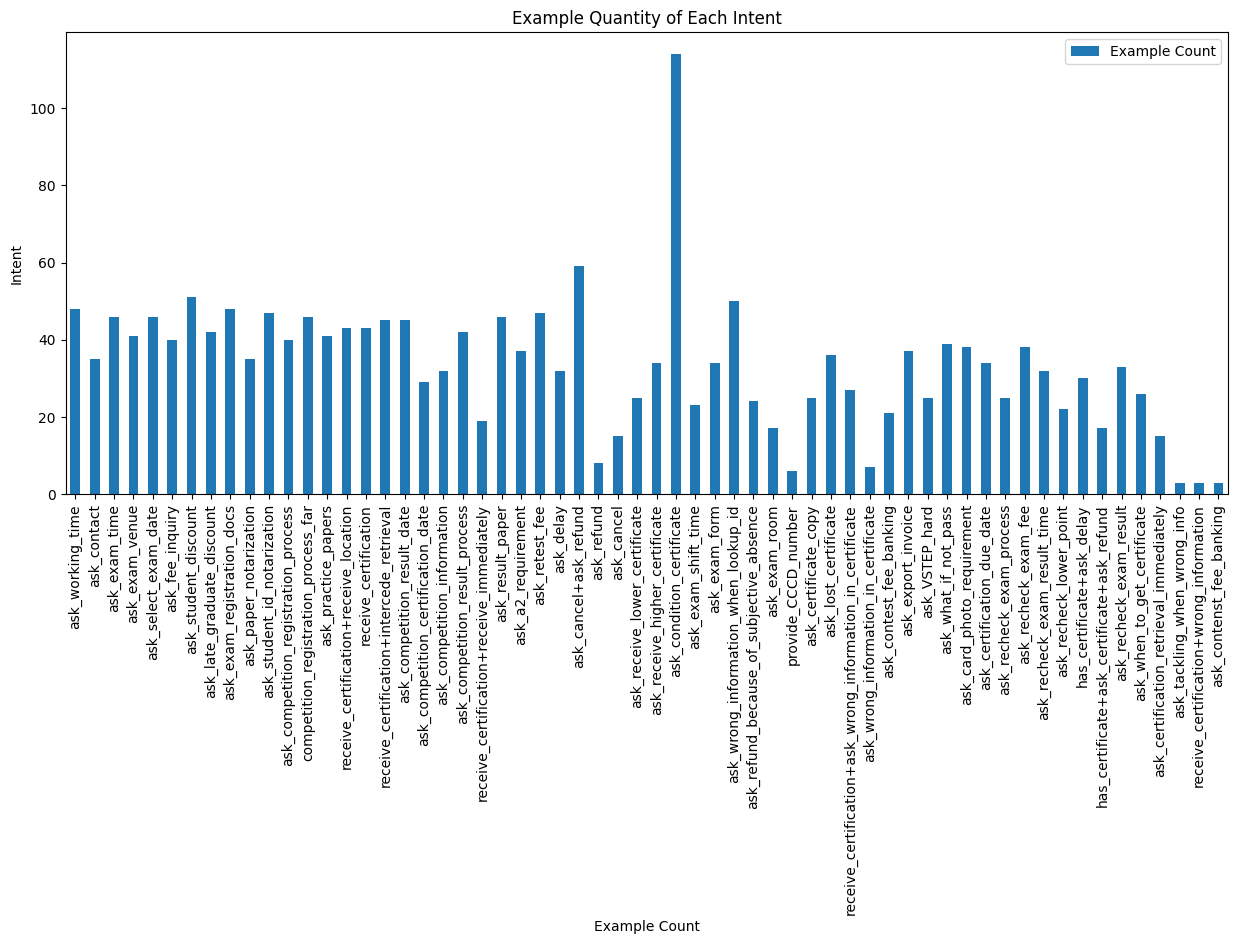

In [47]:
# Convert the intent examples count dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(intent_examples_count, orient='index', columns=['Example Count'])
print(df)
# Plot the example quantity of each intent
df.plot(kind='bar', figsize=(15, 6))
plt.ylabel('Intent')
plt.xlabel('Example Count')
plt.title('Example Quantity of Each Intent')

# addlabels(df.index, df['Example Count'])


plt.show()